In [1]:
from modules.config_loader import load_config
from modules.gpt_module import GPTClient
from modules.lora_manager import load_pipe_with_loras
from modules.ad_generator import generate_ad_banner

/home/spai0107/model_dev/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config = load_config()
config

{'openai': {'api_key_env': 'OPENAI_API_KEY', 'gpt_model': 'gpt-4.1-mini'},
 'sd_pipeline': {'model_id': 'runwayml/stable-diffusion-v1-5',
  'torch_dtype': 'float16',
  'use_safety_checker': False,
  'device': 'cuda'},
 'lora': {'category_map': {'food': [{'name': 'foodplatters', 'scale': 1.0},
    {'name': 'FoodPorn_v2', 'scale': 0.8},
    {'name': 'meishi', 'scale': 0.6}],
   'cosmetics': [{'name': 'e-commerce_photography02', 'scale': 1.0},
    {'name': 'showcase', 'scale': 0.9}],
   'furniture': [{'name': 'product_design_v3', 'scale': 1.0},
    {'name': 'showcase', 'scale': 0.8}]}},
 'image': {'input_size': [512, 512],
  'output_ratios': {'square': [512, 512],
   'landscape': [912, 512],
   'portrait': [512, 912]},
  'overlay_position': {'square': [120, 360],
   'landscape': [200, 360],
   'portrait': [120, 600]}},
 'generation': {'inference_steps': 40,
  'guidance_scale': 8,
  'negative_prompt': 'logo, text, watermark, blurry, extra fingers, human'},
 'paths': {'product_image': './im

In [3]:
import os
gpt_client = GPTClient(
    api_key=os.getenv(config["openai"]["api_key_env"]),
    model_name=config['openai']['gpt_model']
)

[2025-07-03 08:32:32] [INFO] [modules.gpt_module] - Initializing GPTClient with model: gpt-4.1-mini


In [4]:
pipe = load_pipe_with_loras(config, "cosmetics")
pipe

[2025-07-03 08:32:32] [INFO] [modules.lora_manager] - Loading pipeline with category: cosmetics
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  4.92it/s]
[2025-07-03 08:32:50] [INFO] [modules.lora_manager] - Applying LoRAs: ['e-commerce_photography02', 'showcase']
/home/spai0107/model_dev/.venv/lib/python3.10/site-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.34.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

[2025-07-03 08:32:53] [INFO] [modules.ad_generator] - === Start: Generating advertisement banner ===
[2025-07-03 08:32:53] [INFO] [modules.image_utils] - Encoding image: ./images/beach.jfif to size (512, 512)
[2025-07-03 08:32:53] [INFO] [modules.ad_generator] - Generating ad plan from GPT
[2025-07-03 08:32:53] [DEBUG] [modules.gpt_module] - Sending chat message to OpenAI
[2025-07-03 08:32:58] [DEBUG] [modules.gpt_module] - Received response from OpenAI
[2025-07-03 08:32:58] [DEBUG] [modules.ad_generator] - Ad plan:
광고 기획안:

1. 톤: 활기차고 신나는 분위기, 여행의 설렘과 자유로움을 강조  
2. 배경: 푸른 바다와 드넓은 해변, 산과 도시가 조화를 이루는 자연경관을 중심으로 하여 시원한 하늘과 맑은 물빛이 돋보이도록 연출  
3. 레이아웃: 왼쪽 상단 또는 하단에 투명한 컬러 블록을 두어 배너 문구를 배치, 배경의 아름다운 경관을 충분히 보여줌. 사람들과 물놀이하는 모습을 일부 담아 생동감 추가.  

배너 카피 제안:  
- "자연과 도심의 완벽한 만남, 지금 바로 떠나보세요!"  
- "푸른 바다와 함께하는 최고의 여행, 당신을 기다립니다."  
- "꿈꾸던 휴식, 여기에 다 있습니다."  

전체적으로 눈에 띄는 색상과 명료한 문구를 사용해 방문욕구를 자극하는 배너를 제작하는 것을 추천합니다.
[2025-07-03 08:32:58] [INFO] [modules.ad_generator] - Converting ad plan to SD prom

[INFO] Saved square banner: ./out/final_square.png
[INFO] Saved landscape banner: ./out/final_landscape.png
[INFO] Saved portrait banner: ./out/final_portrait.png


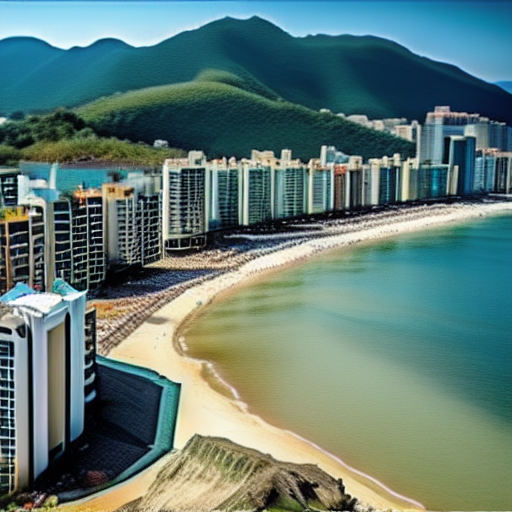

In [5]:
generate_ad_banner(config, gpt_client, pipe)

Original Image


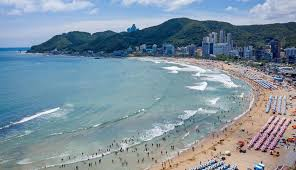

Debug initial generated image


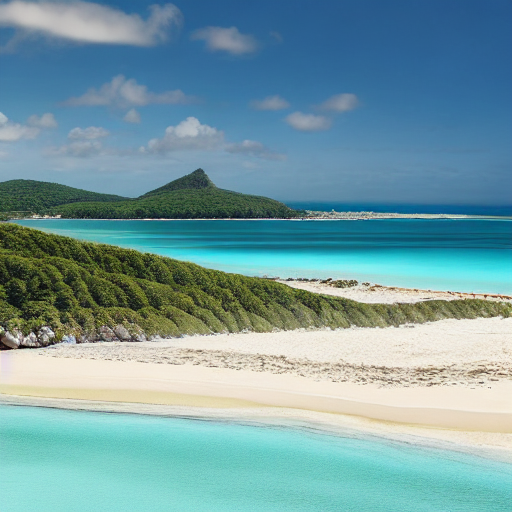

In [6]:
from PIL import Image
print("Original Image")
original_image = Image.open(config['paths']['product_image'])
display(original_image)
print("Debug initial generated image")
bg_image = Image.open('debug_output.png')
display(bg_image)

Ip Adapter generated image


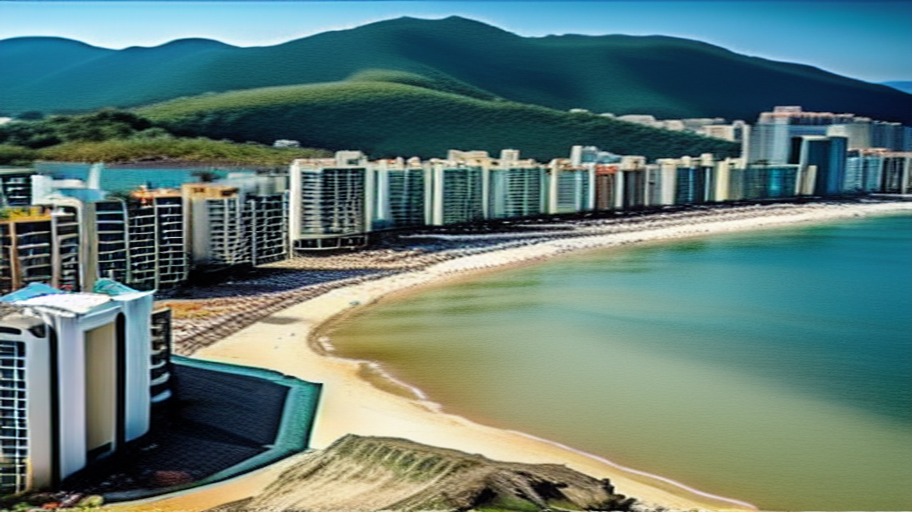

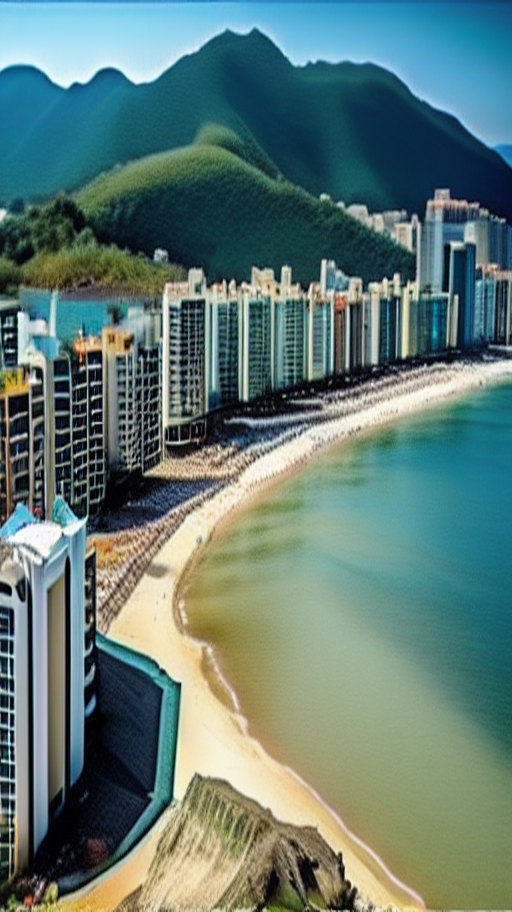

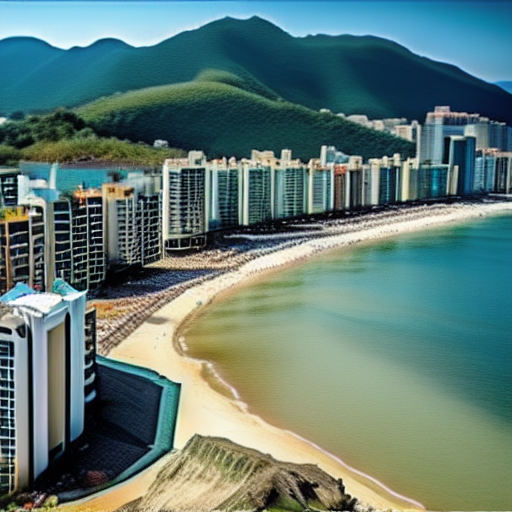

In [7]:
print("Ip Adapter generated image")
display(Image.open('out/final_landscape.png'))
display(Image.open('out/final_portrait.png'))
display(Image.open('out/final_square.png'))

In [8]:
from ip_adapter import IPAdapterPlus

ip_plus = IPAdapterPlus(
    pipe,
    image_encoder_path="laion/CLIP-ViT-H-14-laion2B-s32B-b79K",
    ip_ckpt="ip-adapter-plus_sd15.bin",
    device=config["sd_pipeline"]["device"],
    num_tokens=16
)

In [9]:
results = ip_plus.generate(
    pil_image = original_image,
    image = bg_image,
    prompt = "advertisement style, banner design",
    negative_prompt = "logo, text, watermark, blurry, extra fingers, human",
    scale=0.6,
    num_samples = 2,
    guidance_scale= 8,
    num_inference_steps=50
)

100%|██████████| 50/50 [00:08<00:00,  5.58it/s]


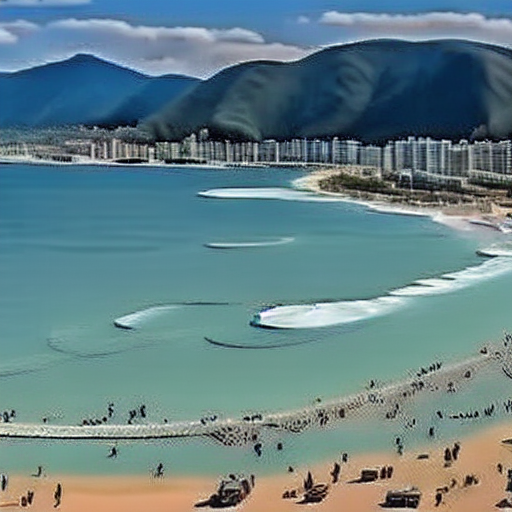

In [10]:
results[0]

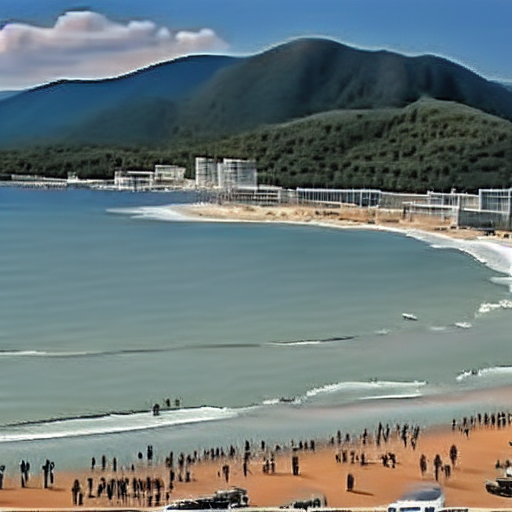

In [11]:
results[1]